# Creating your first gymnasium  environment

The gymnasium  provides a variety of environments for training the reinforcement learning agent. To clearly understand how the gym environment is designed, we will start off with the basic gym environment.

Let's introduce one of the simplest environments called the frozen lake environment. The frozen lake environment is shown below. As we can observe, in the frozen lake environment, the goal of the agent is to start from the initial state S and reach the goal state G.

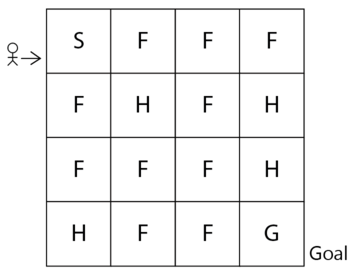

In the above environment, the following applies:

* S denotes the starting state
* F denotes the frozen state
* H denotes the hole state
* G denotes the goal state

So, the agent has to start from the state S and reach the goal state G. But one issue is that if the agent visits the state H, which is just the hole state, then the agent will fall into the hole and die as shown below:


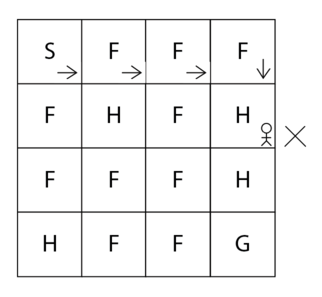

So, we need to make sure that the agent starts from S and reaches G without falling into the hole state H as shown below:


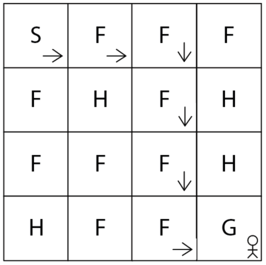
Each grid box in the above environment is called state, thus we have 16 states (S to G) and we have 4 possible actions which are up, down, left and right. We learned that our goal is to reach the state G from S without visiting H. So, we assign reward as 0 to all the states and + 1 for the goal state G.

Thus, we learned how the frozen lake environment works. Now, to train our agent in the frozen lake environment, first, we need to create the environment by coding it from scratch in Python. But luckily we don't have to do that! Since the gym provides the various environment, we can directly import the gym toolkit and create a frozen lake environment using the gym.


Now, we will learn how to create our frozen lake environment using the gym. Before running any code, make sure that you activated our virtual environment universe. First, let's import the gym library:




In [14]:
import gymnasium


Next, we can create a gym environment using the make function.  The make function requires the environment id as a parameter. In the gym, the id of the frozen lake environment is `FrozenLake-v1`. So, we can create our frozen lake environment as shown below:





In [15]:
env = gymnasium.make('FrozenLake-v1',render_mode="rgb_array")

After creating the environment, we can see how our environment looks like using the render function:

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
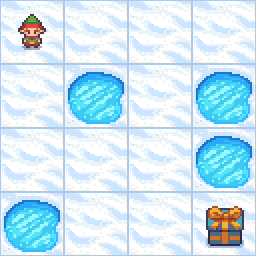

In [16]:
env.reset()
env.render()

In [17]:
env = env.unwrapped


As we can observe, the frozen lake environment consists of 16 states (S to G) as we learned. The state S is highlighted indicating that it is our current state, that is, agent is in the state S. So whenever we create an environment, an agent will always begin from the initial state, in our case, it is the state S.

That's it! Creating the environment using the gym is that simple. In the next section, we will understand more about the gym environment by relating all the concepts we have learned in the previous chapter.





## Exploring the environment

In the previous chapter, we learned that the reinforcement learning environment can be modeled as the Markov decision process (MDP) and an MDP consists of the following:

* __States__ -  A set of states present in the environment
* __Actions__ - A set of actions that the agent can perform in each state.
* __Transition probability__ - The transition probability is denoted by $P(s'|s,a) $. It implies the probability of moving from a state $s$ to the state $s'$ while performing an action $a$.
* __Reward function__ - Reward function is denoted by $R(s,a,s')$. It implies the reward the agent obtains moving from a state $s$ to the state  $s'$ while performing an action $a$.

Let's now understand how to obtain all the above information from the frozen lake environment we just created using the gym.



## States
A state space consists of all of our states. We can obtain the number of states in our environment by just typing `env.observation_space` as shown below:

In [18]:
print(env.observation_space)

Discrete(16)


It implies that we have 16 discrete states in our state space starting from the state S to G. Note that, in the gym, the states will be encoded as a number, so the state S will be encoded as 0, state F will be encoded as 1 and so on.


## Actions

We learned that the action space consists of all the possible actions in the environment. We can obtain the action space by `env.action_space` as shown below:

In [19]:
print(env.action_space)

Discrete(4)


It implies that we have 4 discrete actions in our action space which are left, down, right, up. Note that, similar to states, actions also will be encoded into numbers as shown below:

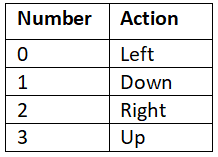

## Transition probability and Reward function

Now, let's look at how to obtain the transition probability and the reward function. We learned that in the stochastic environment, we cannot say that by performing some action $a$, agent will always reach the next state $s'$ exactly because there will be some randomness associated with the stochastic environment and by performing an action $a$ in the state $s$, agent reaches the next state  with some probability.

Let's suppose we are in state 2 (F). Now if we perform action 1 (down) in state 2, we can reach the state 6 as shown below:

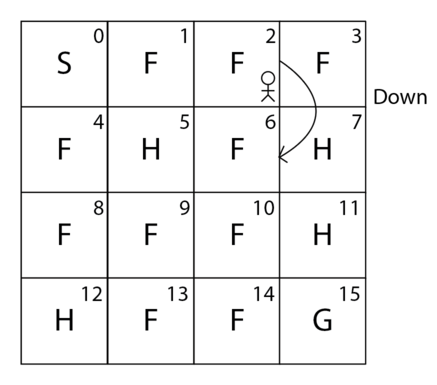

Our frozen lake environment is a stochastic environment. When our environment is stochastic we won't always reach the state 6 by performing action 1(down) in state 2, we also reach other states with some probability. So when we perform an action 1 (down) in the state 2, we reach state 1 with probability 0.33333, we reach state 6 with probability 0.33333 and we reach the state 3 with probability 0.33333 as shown below:


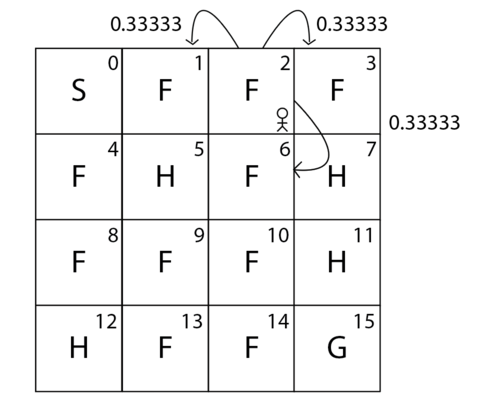

As we can notice, in the stochastic environment we reach the next states with some probability. Now, let's learn how to obtain this transition probability using the gym environment.  

We can obtain the transition probability and the reward function by just typing `env.P[state][action]` So, in order to obtain the transition probability of moving from the state S to the other states by performing an action right, we can type, `env.P[S][right]`. But we cannot just type state S and action right directly since they are encoded into numbers. We learned that state S is encoded as 0 and the action right is encoded as 2, so, in order to obtain the transition probability of state S by performing an action right, we type `env.P[0][2]` as shown below:






In [20]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


What does this imply? Our output is in the form of `[(transition probability, next state, reward, Is terminal state?)]` It implies that if we perform an action 2 (right) in state 0 (S) then:

* We reach the state 4 (F) with probability 0.33333 and receive 0 reward.
* We reach the state 1 (F) with probability 0.33333 and receive 0 reward.
* We reach the same state 0 (S) with probability 0.33333 and receive 0 reward.

The transition probability is shown below:

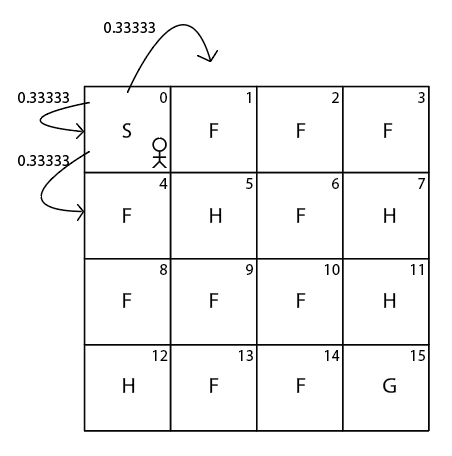

Thus, when we type `env.P[state][action]` we get the result in the form of `[(transition probability, next state, reward, Is terminal state?)]`. The last value is the boolean and it implies that whether the next state is a terminal state, since 4, 1 and 0 are not the terminal states it is given as false.

The output of `env.P[0][2]` is shown in the below table for more clarity:

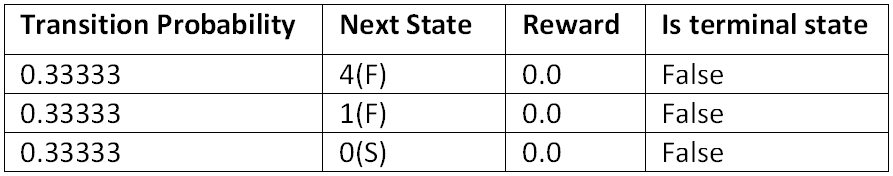

Let's understand this with one more example. Let's suppose we are in the state 3 (F) as shown below:

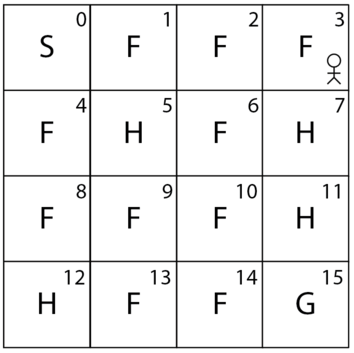

Say, we perform action 1 (down) in the state 3(F). Then the transition probability of the state 3(F) by performing action 1(down) can be obtained as shown below:



In [21]:
print(env.P[3][1])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


As we learned, our output is in the form of `[(transition probability, next state, reward, Is terminal state?)]` It implies that if we perform an action 1 (down) in state 3 (F) then:

* We reach the state 2 (F) with probability 0.33333 and receive 0 reward.
* We reach the state 7 (H) with probability 0.33333 and receive 0 reward.
* We reach the same state 3 (F) with probability 0.33333 and receive 0 reward.


The transition probability is shown below:

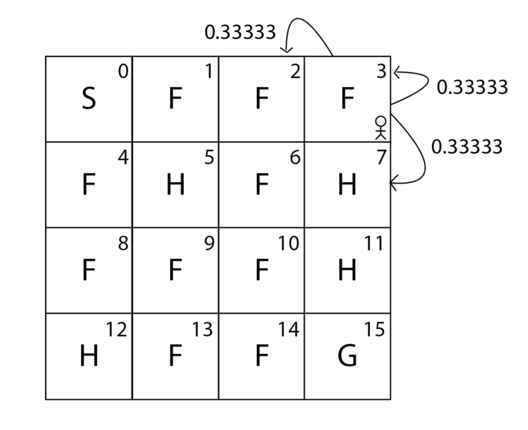



The output of `env.P[3][1]` is shown in the below table for more clarity:

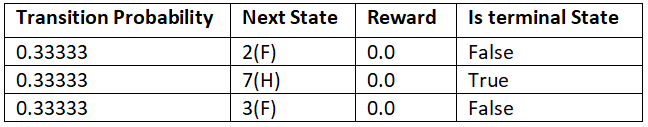

As we can observe, in the second row of our output, we have, `(0.33333, 7, 0.0, True)`,and the last value here is marked as True. It implies that state 7 is a terminal state. That is, if we perform action 1(down) in state 3(F) then we reach the state 7(H) with 0.33333 probability and since 7(H) is a hole, the agent dies if it reaches the state 7(H). Thus 7(H) is a terminal state and so it is marked as True.

Thus, we learned how to obtain the state space, action space, transition probability and the reward function using the gym environment.